In [2]:
from astropy.table import Table, vstack, Column, unique
from astropy.coordinates import SkyCoord, Angle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import astropy.units as u

In [3]:
plotpar = {'axes.labelsize': 17,
           'font.size': 12,
           'legend.fontsize': 17,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False}
plt.rcParams.update(plotpar)

In [6]:
df = Table.read('../../catalogs/TrainingSet/combined.csv')
df = df.to_pandas()
df

,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved
0,429535384479232,45.084708,1.417250,10.251890,0.598249,4.920000,87,NaN,0,1,0
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0
2,997948536825216,46.696083,2.714472,7.990882,0.185992,2.487000,41,NaN,0,1,0
3,1268325318000128,44.312083,1.887583,8.011133,0.769515,1.745000,100,NaN,0,1,0
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0
277592,5140693571158739840,24.771554,-17.948300,10.507542,3.752956,12.367461,9,NaN,1,0,0
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0
277594,3864972938605115520,164.103190,7.002727,11.038391,4.184836,0.835335,3,NaN,1,0,0


In [12]:
mask_ruwe = np.where(df['ruwe'] > 1.4, 1 ,0)
mask_ipd = np.where(df['ipd_frac_multi_peak'] >= 2, 1, 0)

In [14]:
df['ruwe_flag'] = mask_ruwe
df['ipd_flag'] = mask_ipd
df

,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved,ruwe_flag,ipd_flag
0,429535384479232,45.084708,1.417250,10.251890,0.598249,4.920000,87,NaN,0,1,0,1,1
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0,0,0
2,997948536825216,46.696083,2.714472,7.990882,0.185992,2.487000,41,NaN,0,1,0,1,1
3,1268325318000128,44.312083,1.887583,8.011133,0.769515,1.745000,100,NaN,0,1,0,1,1
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0,0,1
277592,5140693571158739840,24.771554,-17.948300,10.507542,3.752956,12.367461,9,NaN,1,0,0,1,1
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0,0,0
277594,3864972938605115520,164.103190,7.002727,11.038391,4.184836,0.835335,3,NaN,1,0,0,0,1


In [16]:
df['rv_amplitude_robust'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 277596 entries, 0 to 277595
Series name: rv_amplitude_robust
Non-Null Count   Dtype  
--------------   -----  
131108 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


In [18]:
df_removed = df[~df['rv_amplitude_robust'].isnull()]
df_removed

,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved,ruwe_flag,ipd_flag
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0,0,0
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0,0,0
5,2543861884981632,47.310542,3.242750,8.123917,0.066383,0.898000,85,7.278629,0,1,0,0,1
6,3461301259765120,46.152792,4.126389,10.542889,1.233669,3.357000,99,3.101049,0,1,0,1,1
8,4645750160709248,42.836708,3.056833,7.312822,0.467812,0.965000,0,5.134388,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277585,4810594479418041856,77.959937,-45.043813,8.063552,2.026646,1.170168,0,0.856018,1,0,0,0,0
277588,4848140361962951552,54.003394,-44.514362,10.995456,3.665376,1.192231,8,2.575779,1,0,0,0,1
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0,0,1
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0,0,0


In [26]:
def func(x,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6):
    bp_rp,gmag = x
    return np.polyval([x1,x2,x3,x4,x5,x6],bp_rp) + np.polyval([y1,y2,y3,y4,y5,y6],gmag)

def binary_rv(bp_rp, g_mag):
    res = [2.24289064e-01, -1.69869809e+00,  4.27944552e+00, -3.64109560e+00,
           -5.25196962e-01,  1.77517064e+07,  1.04694432e-05, -9.19845952e-04,
           2.39080278e-02, -2.42979966e-01,  1.12630607e+00, -1.77517074e+07]
    binary = np.zeros(len(bp_rp))
    binary[df_removed['rv_amplitude_robust'] > 30 * func([bp_rp, g_mag], *res)] = 1
    
    return binary

In [28]:
df_removed['rv_flag_old'] = binary_rv(df_removed['bp_rp'], df_removed['phot_g_mean_mag']).astype(int)
df_removed

/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_5306/3046010352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed['rv_flag_old'] = binary_rv(df_removed['bp_rp'], df_removed['phot_g_mean_mag']).astype(int)


,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved,ruwe_flag,ipd_flag,rv_flag_old
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0,0,0,1
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0,0,0,0
5,2543861884981632,47.310542,3.242750,8.123917,0.066383,0.898000,85,7.278629,0,1,0,0,1,0
6,3461301259765120,46.152792,4.126389,10.542889,1.233669,3.357000,99,3.101049,0,1,0,1,1,0
8,4645750160709248,42.836708,3.056833,7.312822,0.467812,0.965000,0,5.134388,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277585,4810594479418041856,77.959937,-45.043813,8.063552,2.026646,1.170168,0,0.856018,1,0,0,0,0,1
277588,4848140361962951552,54.003394,-44.514362,10.995456,3.665376,1.192231,8,2.575779,1,0,0,0,1,0
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0,0,1,0
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0,0,0,1


In [30]:
plt.scatter(df_removed['phot_g_mean_mag'][rv_old_flag], df_removed['rv_amplitude_robust'][rv_old_flag], label = 'Binary')
plt.scatter(df_removed['phot_g_mean_mag'][~rv_old_flag], df_removed['rv_amplitude_robust'][~rv_old_flag], label = 'Single')

coefficients = np.polyfit(df_removed['phot_g_mean_mag'][rv_old_flag], np.log(df_removed['rv_amplitude_robust'][rv_old_flag]), 2) 

# coefficients[0] += 0.0045

#construct the poly
poly = np.poly1d(coefficients)

# x_axis
x_fit = np.linspace(min(df_removed['phot_g_mean_mag'][rv_old_flag]), max(df_removed['phot_g_mean_mag'][rv_old_flag]), 100)

# y_axis 
y_fit = np.exp(poly(x_fit))

#fit curve
plt.plot(x_fit, y_fit, color='red', label='Fit Curve (Binary Stars)')


NameError: name 'rv_old_flag' is not defined

In [32]:
rv_old_flag = df_removed['rv_flag_old'] == 1

/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_5306/685067397.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed['rv_amp_bin'] = np.where(pts_above & g_cut, 1, 0)


,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved,ruwe_flag,ipd_flag,rv_flag_old,rv_amp_bin
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0,0,0,1,1
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0,0,0,0,1
5,2543861884981632,47.310542,3.242750,8.123917,0.066383,0.898000,85,7.278629,0,1,0,0,1,0,1
6,3461301259765120,46.152792,4.126389,10.542889,1.233669,3.357000,99,3.101049,0,1,0,1,1,0,0
8,4645750160709248,42.836708,3.056833,7.312822,0.467812,0.965000,0,5.134388,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277585,4810594479418041856,77.959937,-45.043813,8.063552,2.026646,1.170168,0,0.856018,1,0,0,0,0,1,0
277588,4848140361962951552,54.003394,-44.514362,10.995456,3.665376,1.192231,8,2.575779,1,0,0,0,1,0,0
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0,0,1,0,0
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0,0,0,1,0


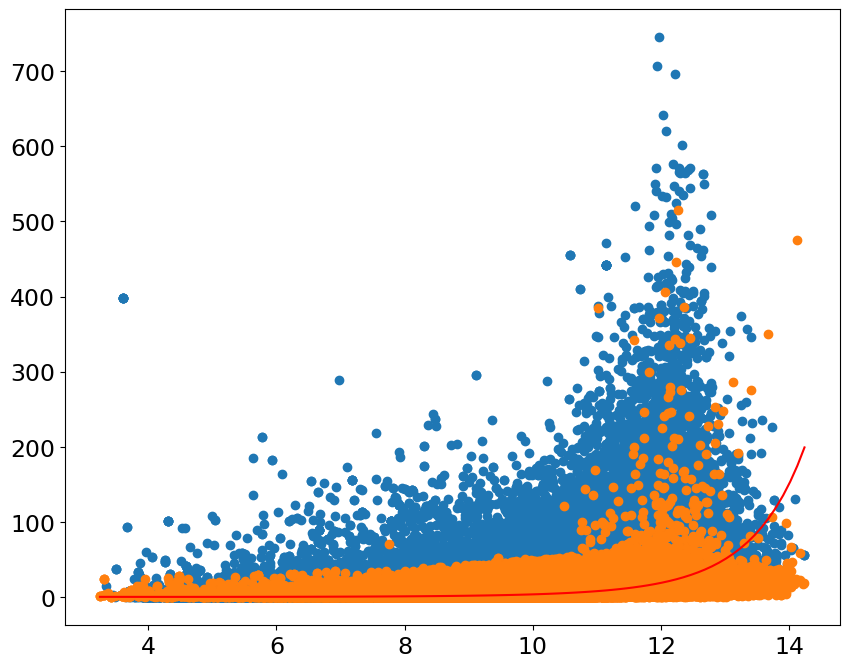

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(df_removed['phot_g_mean_mag'][rv_old_flag], df_removed['rv_amplitude_robust'][rv_old_flag], label = 'Binary')
plt.scatter(df_removed['phot_g_mean_mag'][~rv_old_flag], df_removed['rv_amplitude_robust'][~rv_old_flag], label = 'Single')

coefficients = [0.05913835, -0.50597684,  0.51327916]
poly = np.poly1d(coefficients)
# poly

# x_axis
x_fit = np.linspace(min(df_removed['phot_g_mean_mag']), max(df_removed['phot_g_mean_mag']), 100)

# y_axis 
y_fit = np.exp(poly(x_fit))

# fit curve
plt.plot(x_fit, y_fit, color='red', label='Fit Curve (Binary Stars)')

pts_above = df_removed['rv_amplitude_robust'] > np.exp(poly(df_removed['phot_g_mean_mag']))
g_cut =  df_removed['phot_g_mean_mag'] < 12

rv_amplitude_above = df_removed['rv_amplitude_robust'][pts_above & g_cut]
g_above = df_removed['rv_amplitude_robust'][pts_above & g_cut]

df_removed['rv_amp_bin'] = np.where(pts_above & g_cut, 1, 0)

df_removed

In [36]:
# np.sum(df_removed['rv_amp_bin'])
test_flag = (df_removed['ruwe_flag'][6] + df_removed['ipd_flag'][6] + df_removed['rv_amp_bin'][6])
test_flag

2

In [38]:
final_three_flag = (df_removed['ruwe_flag'] + df_removed['ipd_flag'] + df_removed['rv_amp_bin']) 
final_three_flag
flag = np.where(final_three_flag > 0, 1 ,0)

df_removed.loc[:, 'three_flags'] = flag.astype(int)
df_removed

/var/folders/63/qfkhcrwd7b72kqr1sr3jz6s80000gn/T/ipykernel_5306/1023204674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed.loc[:, 'three_flags'] = flag.astype(int)


,source_id,ra,dec,phot_g_mean_mag,bp_rp,ruwe,ipd_frac_multi_peak,rv_amplitude_robust,Single,unresolved,resolved,ruwe_flag,ipd_flag,rv_flag_old,rv_amp_bin,three_flags
1,961973890657152,46.020917,2.702972,11.357053,0.739875,0.998000,0,62.793167,0,1,0,0,0,1,1,1
4,1753553543188992,45.463583,3.138056,8.163041,0.126472,1.033000,0,5.291431,0,1,0,0,0,0,1,1
5,2543861884981632,47.310542,3.242750,8.123917,0.066383,0.898000,85,7.278629,0,1,0,0,1,0,1,1
6,3461301259765120,46.152792,4.126389,10.542889,1.233669,3.357000,99,3.101049,0,1,0,1,1,0,0,1
8,4645750160709248,42.836708,3.056833,7.312822,0.467812,0.965000,0,5.134388,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277585,4810594479418041856,77.959937,-45.043813,8.063552,2.026646,1.170168,0,0.856018,1,0,0,0,0,1,0,0
277588,4848140361962951552,54.003394,-44.514362,10.995456,3.665376,1.192231,8,2.575779,1,0,0,0,1,0,0,1
277591,1926461164913660160,355.480015,44.170376,10.379277,3.529414,1.027328,8,1.328781,1,0,0,0,1,0,0,1
277593,762815470562110464,165.830960,35.948653,6.551172,2.215609,0.963849,0,0.536865,1,0,0,0,0,1,0,0


In [40]:
df_removed['rv_amplitude_robust'].isnull().sum()

0

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
y_true = (df_removed['unresolved'] == 1)
y_pred = (df_removed['three_flags'] == 1)

In [46]:
np.sum(df_removed['three_flags'])

66739

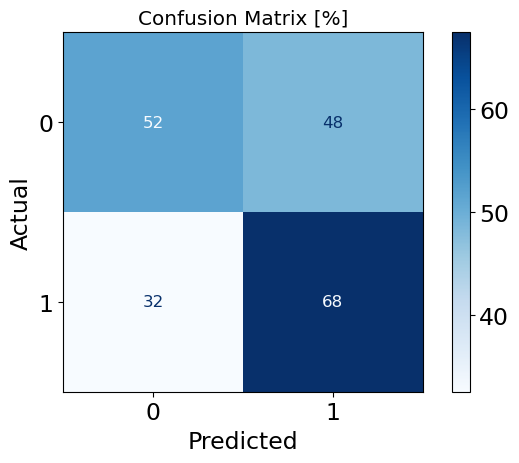

In [132]:
cm = confusion_matrix(y_true, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
disp.plot(cmap ='Blues')
plt.title('Confusion Matrix [%]')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

# plt.savefig('../../plots/presentation/threeflags_cm.png')

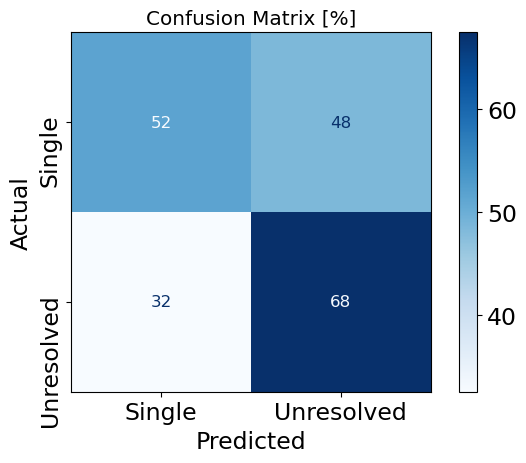

In [136]:
cm = confusion_matrix(y_true, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
fig, ax = plt.subplots()

# Plot with custom labels
disp.plot(cmap='Blues', ax=ax)

# Set axis titles and labels
ax.set_title('Confusion Matrix [%]')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Change x and y tick labels directly
ax.set_xticklabels(['Single', 'Unresolved'])
ax.set_yticklabels(['Single', 'Unresolved'], rotation=90)

plt.tight_layout()
# plt.savefig('../../plots/presentation/threeflags_cm.png')

In [370]:
#false positives check
ids = df_removed[~y_true & y_pred]['source_id']


16049     2523280745098845696
17306     3044492176272881792
19885     6390534929810377216
23452      986255195606677888
24341     3432955368148009344
                 ...         
277577    2603090003484152064
277581      76868614540049408
277582    2306965202564744064
277588    4848140361962951552
277591    1926461164913660160
Name: source_id, Length: 55491, dtype: int64

In [8]:
tbl = Table.read('../../catalogs/Wash/wds_crsm.vot')
tbl = tbl.to_pandas()
tbl

,idx,source_id,ra,dec,ra_x,dec_x,sep,mag,ruwe,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,phot_g_mean_mag,bp_rp
0,0,2877263810670494208,2.819042,36.104167,2.819058,36.104140,-1.000000,9.100000e+00,1.066,0.7373,0.0197,37.4463,10.120,6.018,0.025,-8.136,0.012,False,9.759370,2.185787
1,0,2877263810670494208,2.819048,36.103889,2.819058,36.104140,-1.000000,1.300000e+01,1.066,0.7373,0.0197,37.4463,10.120,6.018,0.025,-8.136,0.012,False,9.759370,2.185787
2,1,2541055763604440960,7.317542,-1.955278,7.317618,-1.955293,-1.000000,1.085000e+01,0.907,1.1702,0.0167,69.8815,21.936,21.379,0.024,-4.909,0.016,True,10.467856,1.405166
3,1,2541055763604440960,7.317547,-1.955556,7.317618,-1.955293,-1.000000,1.000000e+20,0.907,1.1702,0.0167,69.8815,21.936,21.379,0.024,-4.909,0.016,True,10.467856,1.405166
4,2,2427237687150327552,7.357417,-8.422083,7.357377,-8.422136,-1.000000,1.145000e+01,0.860,2.4856,0.0188,132.2714,15.355,-7.223,0.022,-13.550,0.017,False,11.226878,1.049957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303453,156638,2480600525499272064,24.133125,-4.646694,24.133920,-4.646935,549.799988,1.549000e+01,1.137,2.6828,0.0364,73.6132,182.805,174.122,0.035,-55.668,0.022,False,15.118629,1.291410
303454,156638,2480791904946629376,24.130451,-4.493995,24.130630,-4.494296,549.799988,2.000000e+01,1.021,12.0557,0.2327,51.8041,172.699,168.221,0.246,-39.074,0.157,False,18.737429,3.752626
303455,156639,2773086595766697856,1.481500,18.076222,1.480449,18.075225,572.900024,9.320000e+00,0.905,26.6376,0.0212,1253.6366,207.342,-147.421,0.021,-145.800,0.019,True,8.946492,1.092909
303456,156639,2797111130991722240,1.478576,18.235337,1.477413,18.234350,572.900024,7.470000e+00,1.036,26.6978,0.0286,934.4919,211.317,-150.855,0.027,-147.978,0.027,True,7.318629,0.741892


In [10]:
mask = tbl['source_id'].isin(ids)

NameError: name 'ids' is not defined

In [386]:
tbl_new = tbl[mask]
tbl_new

,idx,source_id,ra,dec,ra_x,dec_x,sep,mag,ruwe,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,phot_g_mean_mag,bp_rp
16,9,145293181643038336,66.576792,21.470528,66.577571,21.470262,-1.000000,6.20,2.122,21.0221,0.0518,405.7036,110.257,103.575,0.067,-37.798,0.050,False,7.239102,0.683954
17,9,145293181643038336,66.576797,21.470250,66.577571,21.470262,-1.000000,10.10,2.122,21.0221,0.0518,405.7036,110.257,103.575,0.067,-37.798,0.050,False,7.239102,0.683954
22,12,3312849326428424704,67.640125,16.194028,67.640621,16.193901,-1.000000,4.90,1.689,22.1875,0.1430,155.1337,107.931,104.889,0.163,-25.446,0.108,False,4.752029,0.232951
23,12,3312849326428424704,67.640130,16.193750,67.640621,16.193901,-1.000000,7.60,1.689,22.1875,0.1430,155.1337,107.931,104.889,0.163,-25.446,0.108,False,4.752029,0.232951
92,47,4321830946399905664,294.322417,16.462778,294.322548,16.462866,-1.000000,5.77,0.807,5.7371,0.0485,118.3781,21.643,16.543,0.045,13.955,0.045,False,5.411448,1.141779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303385,156604,1823995335563202688,295.752958,17.369083,295.752941,17.369026,50.799999,13.66,1.047,0.1660,0.0198,8.3712,8.689,-4.351,0.019,-7.521,0.018,False,12.475897,2.627358
303409,156616,4470187466173297920,271.990750,3.621083,271.990718,3.621068,92.300003,8.72,1.094,2.7328,0.0248,110.1504,2.034,-0.170,0.027,-2.027,0.026,True,8.657352,0.266111
303413,156618,2669085646320598016,330.407042,-4.858972,330.407063,-4.858955,95.500000,9.23,1.536,1.4607,0.0345,42.3105,6.633,1.619,0.039,6.432,0.040,False,8.633924,1.593204
303431,156627,163469414522089088,60.947583,27.092583,60.948048,27.092261,120.599998,12.60,1.589,4.7880,0.0240,199.6758,98.885,75.758,0.026,-63.552,0.016,False,12.042454,1.099773


In [402]:
np.sum(tbl_new['sep'] == -1)

12